In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("UniversityCosts.csv")

In [3]:
pub_df= df.loc[(df['Type'].str.contains('Public'))]

In [4]:
yr_df = pub_df.loc[(df['Year'].between(2017,2020))]

In [5]:
st_df = yr_df.loc[(df['State'] == 'New York') | (df['State'] == 'Pennsylvania') | (df['State'] == 'Massachusetts')]

In [6]:
final_df = st_df.loc[(df['Length'] == '4-year')]

In [7]:
#Results head.
final_df.head(5)

,Year,State,Type,Length,Expense,Value
1777,2017,Massachusetts,Public In-State,4-year,Fees/Tuition,12331
1778,2017,Massachusetts,Public In-State,4-year,Room/Board,12142
1780,2017,Massachusetts,Public Out-of-State,4-year,Fees/Tuition,28740
1781,2017,Massachusetts,Public Out-of-State,4-year,Room/Board,12142
1865,2017,New York,Public In-State,4-year,Fees/Tuition,7709


In [19]:
#Results tail.
final_df.tail(5)

,Year,State,Type,Length,Expense,Value
3060,2020,New York,Public Out-of-State,4-year,Room/Board,15408
3104,2020,Pennsylvania,Public In-State,4-year,Fees/Tuition,15565
3105,2020,Pennsylvania,Public In-State,4-year,Room/Board,11839
3107,2020,Pennsylvania,Public Out-of-State,4-year,Fees/Tuition,30222
3108,2020,Pennsylvania,Public Out-of-State,4-year,Room/Board,11839


In [23]:
#Calculate highest, lowest and average grouping by State and Expense.
result = final_df.groupby(['State', 'Expense']).agg({'Value': ['max', 'min', 'mean']})
result.columns = ['Highest Expenses', 'Lowest Expenses', 'Avg Expenses']
result

Highest Expenses  Lowest Expenses  Avg Expenses
State         Expense                                                      
Massachusetts Fees/Tuition             31894            12331     21687.250
              Room/Board               13889            12142     12995.750
New York      Fees/Tuition             22669             7709     15020.750
              Room/Board               15408            14042     14681.000
Pennsylvania  Fees/Tuition             30222            14068     21398.125
              Room/Board               11839            11261     11459.750

Text(0.5, 1.0, 'High and Low Expense Values by Type Within State')

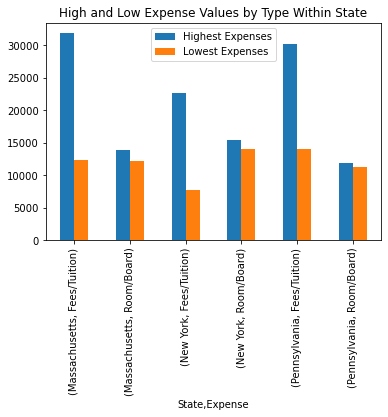

In [36]:
#Plot bar graph from calculations.
result[['Highest Expenses', 'Lowest Expenses']].plot.bar().set_title('High and Low Expense Values by Type Within State')